# Data Preprocessing

## 1. Import Libraries

In [4]:
import re
import pandas as pd 
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Input
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from matplotlib import pyplot as plt
import keras


## 2. Load and Inspect Data

In [5]:
file_path = "D:\main project\data\spam_or_not_spam.csv"
df = pd.read_csv(file_path)
print(df.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [6]:
print(df.shape)

(3000, 2)


## 3. Get Class Percentage

In [7]:
spam_percentage = (df["label"].value_counts()*100/df.shape[0])[1]
ham_percentage = (df["label"].value_counts()*100/df.shape[0])[0]
print(f"Percentage of spam emails: {spam_percentage:.2f}%")

Percentage of spam emails: 16.67%


## 4. Function to Remove Given RegEx pattern

In [8]:
def remove_pattern(text, pattern):
    cleaned_text = re.sub(pattern, "", str(text))
    return " ".join(cleaned_text.split(" "))

## 5. Remove Unnecessary Patterns

In [9]:
# Lambda expression to remove pattern NUMBER from the text
df["email"] = df["email"].progress_apply(lambda x: remove_pattern(x, "NUMBER"))

# Write Lambda expression to remove pattern URL from the text
df["email"] = df["email"].progress_apply(lambda text: re.sub(r'https?://\S+|www\.\S+', '', text))

# Write Lambda expression to remove underscores from the text

df["email"] = df["email"].progress_apply(lambda text: text.replace("_", ""))

# Write Lambda expression to remove emails from the text

df["email"] = df["email"].progress_apply(lambda text: re.sub(r'\S+@\S+', '', text))


# Write Lambda expression to remove digits

df["email"] = df["email"].progress_apply(lambda text: re.sub(r'\d', '', text))



  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:00<00:00, 42564.91it/s]


In [10]:
df

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chri...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 6. Function to Replace Text

In [8]:
#def replace_text(source_pattern, destination_pattern, text):
   # text = text.replace(source_pattern, destination_pattern)
   # return text

## 7. Decontraction of Phrases

In [9]:
# Write Lamda Expression to replace pattern won't to will not
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"won't", "will not"))

In [11]:

# Write Lamda Expression to replace pattern can't --> can not
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"can't", "can not"))


In [13]:

# Write Lamda Expression to replace pattern n't --> not
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"n't", "not"))


In [15]:

# Write Lamda Expression to replace pattern 're --> are
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"re", "are"))


In [17]:

# Write Lamda Expression to replace pattern 's -> is
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"s", "is"))


In [19]:

# Write Lamda Expression to replace pattern 'd -> would
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"d", "would"))


In [21]:

# Write Lamda Expression to replace pattern 'll -> will
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"ll", "will"))


In [23]:

# Write Lamda Expression to replace pattern 've -> have
#df["email"] = df["email"].progress_apply(lambda x: replace_text(x, r"ve", "have"))


In [25]:
# Write function to convert text to lowercase
#def convert_to_lowercase(text):
    #return text.lower()





In [27]:

# Write function to replace non-alphabets
#def replace_non_alphabets(text, replacement=' '):
    #return re.sub(r'[^a-zA-Z]+', replacement, text)

## 8. Convert Feature Column to Categorical

In [29]:


# Example DataFrame with a feature column


# Convert the 'Feature' column to categorical


# Display the DataFrame



## 9. Separate Features and Labels

In [11]:


# Example DataFrame with features and labels


# Separate features and labels
X= df['email']
y=df['label']




# Display the separated features and labels


## 10. Perform Train-Test Split

In [13]:


# Example DataFrame with features and labels


# Separate features and labels


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)



# Display the shapes of the training and testing sets



In [14]:
df

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chri...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 11. Compute maximum number of words in all emails

In [15]:


# Assuming you have a DataFrame with an 'Emails' column
# Replace 'your_data.csv' with the actual file containing your email data


# Assuming the 'Emails' column contains the text of emails
# You may need to preprocess the text if required (e.g., remove punctuation, lowercasing, etc.)

# Split each email into words and calculate the number of words in each email

# Find the maximum number of words across all emails
length_of_the_messages = df["email"].str.split("\\s+")

max_words=(length_of_the_messages.str.len().max())


## 12. Create Keras preprocessing Tokenizer Object

In [16]:
# Fit Tokenizer object on train data
# Encode X_train and X_test using the Tokenizer object
# Assuming you have a DataFrame with a 'Text' column
# Replace 'your_data.csv' with the actual file containing your text data
# Assuming 'Text' column contains the text data
# Split the data into training and testing sets
# Create a Tokenizer object
# Fit the tokenizer on the training data
# Encode the training and testing data using the fitted tokenizer
# Example of the encoded sequences
# If you want to pad the sequences to have the same length
# Example of the padded sequences

keras_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=max_words)

keras_tokenizer.fit_on_texts(df["email"])

X_train_sequence=keras_tokenizer.texts_to_sequences(X_train)        
X_test_sequence=keras_tokenizer.texts_to_sequences(X_test)

## 13. Pad Input Sequences using Keras preprocessing pad_sequences function

In [17]:
#Pad the sequences to have the same length

# Display the shapes of the padded sequences

train_pad_sequence=pad_sequences(
X_train_sequence,
    maxlen=1000,
    padding='post',  
)
test_pad_sequence=pad_sequences(
X_test_sequence,
    maxlen=1000,
    padding='post',  
)






In [18]:
train_pad_sequence.shape

(2250, 1000)

## 14. Create Character Embedding 

In [19]:
#Create a Sequential model

# Add an Embedding layer for character embeddings

# Add an LSTM layer (you can use GRU or other recurrent layers as well)


# Add a Dense layer for classification (adjust units based on your specific task)


# Compile the model


# Display the model summary


# Modeling

## 15. Define Model Architecture Using Functional API

In [20]:
# Define the model using the Functional API

# Compile the model


# Display the model summary
input_layer= Input(shape=(1000,))
dense_layer1= Dense(16)(input_layer)
dense_layer2= Dense(32)(dense_layer1)
dense_layer3= Dense(64)(dense_layer2)
dense_layer4= Dense(128)(dense_layer3)
output_layer= Dense(2)(dense_layer4)

## 16. Define Optimizer (e.g. Adam)

In [21]:


# ... (previous code for data preprocessing and model definition)

# Compile the model with the Adam optimizer
optimizer_adam=Adam(
    learning_rate=0.001,

)

## 17. Write class for custom callback for micro-f1 score

## 18. Create Modelcheckpoint Callback

In [22]:
model_checkpoint_callback=keras.callbacks.ModelCheckpoint(
    filepath='D:\source_detection\model\model.hdf5',
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="min",
)

## 19. Create Callback for TensorBoard

## 20. Compile the Model

In [23]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer_adam,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

## 21. Train the model using model.fit()

In [24]:
history=model.fit(
    x=train_pad_sequence,
    y=y_train,
    batch_size=32,
    epochs=25,
    validation_data=(test_pad_sequence, y_test),
    callbacks=[model_checkpoint_callback]
    )



Epoch 1/25


71/71 [==============================] - 3s 9ms/step - loss: 11.1777 - accuracy: 0.7591 - val_loss: 11.6467 - val_accuracy: 0.7867
Epoch 2/25
71/71 [==============================] - 0s 5ms/step - loss: 11.1182 - accuracy: 0.7742 - val_loss: 11.7146 - val_accuracy: 0.8107
Epoch 3/25
71/71 [==============================] - 0s 5ms/step - loss: 9.1916 - accuracy: 0.7916 - val_loss: 8.4605 - val_accuracy: 0.7733
Epoch 4/25
71/71 [==============================] - 0s 5ms/step - loss: 8.2412 - accuracy: 0.7791 - val_loss: 8.3986 - val_accuracy: 0.7707
Epoch 5/25
71/71 [==============================] - 0s 5ms/step - loss: 7.9580 - accuracy: 0.7929 - val_loss: 7.5571 - val_accuracy: 0.8093
Epoch 6/25
71/71 [==============================] - 0s 5ms/step - loss: 7.4109 - accuracy: 0.8111 - val_loss: 7.5571 - val_accuracy: 0.8093
Epoch 7/25
71/71 [==============================] - 0s 5ms/step - loss: 7.4037 - accuracy: 0.8111 - val_loss: 7.5571 - val_accuracy: 0.8093
Epoch 8/25
71/

## 22. Plot Performance Curves Using history object

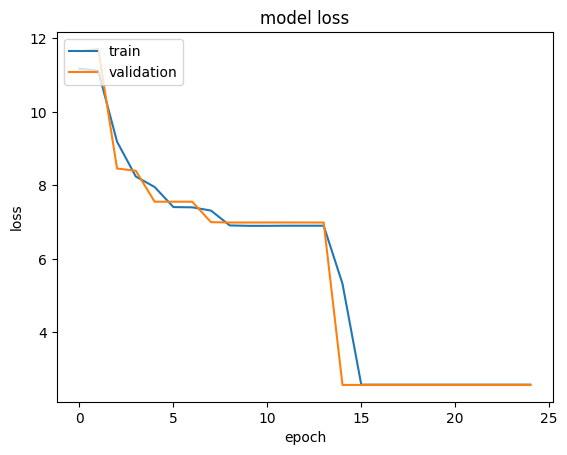

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 23. Plot Model Architecture Using keras.utils plot_model function

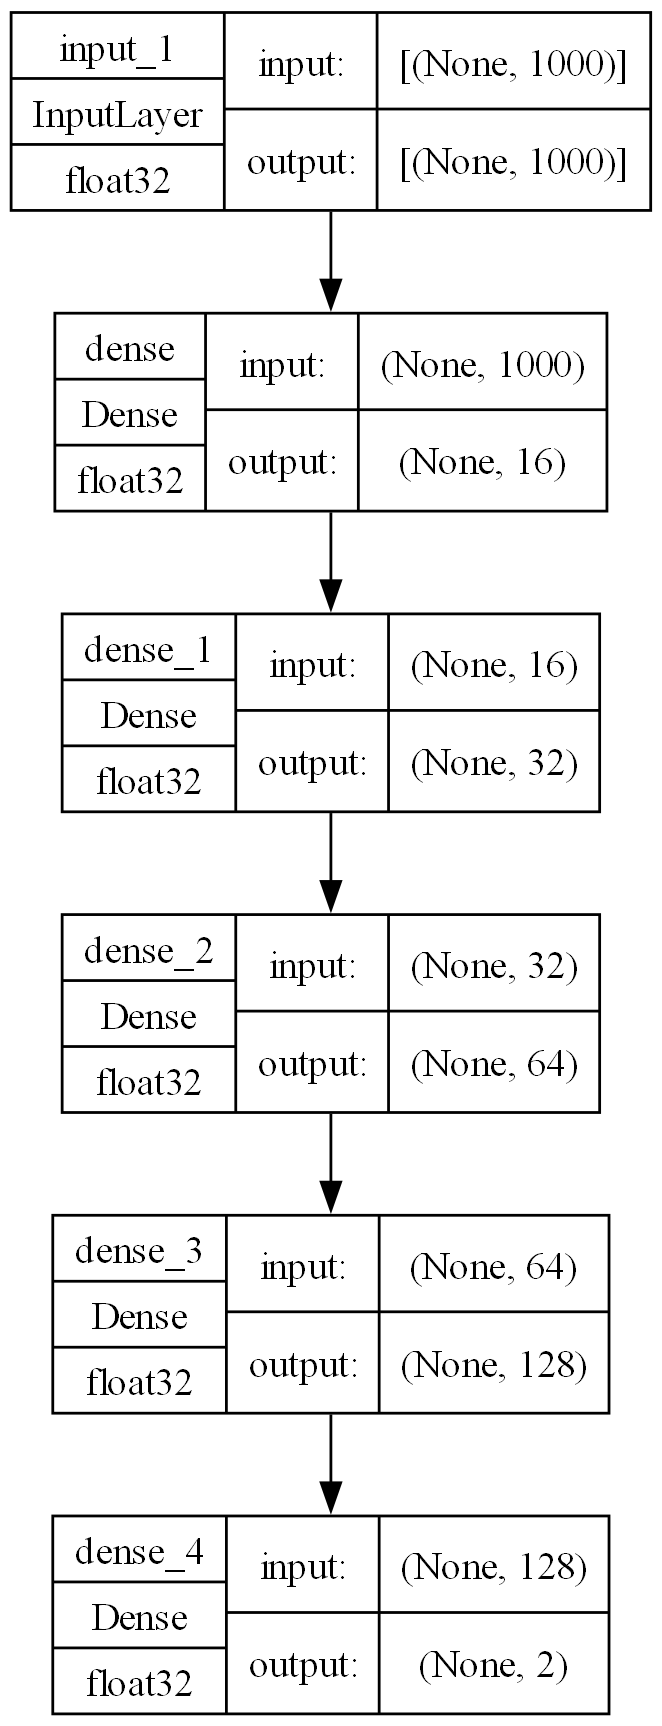

In [26]:
keras.utils.plot_model(
    model,
    to_file="D:\source_detection\plots\model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    dpi=200,
)